In [6]:
from IPython.display import Markdown
from IPython.display import clear_output
import matplotlib.pyplot as plt

import numpy as np
import random
import time

In [7]:
class Minesweeper:
    Rewards = 0
    N = 0
    K = 0
    arr_sam = [[0 for row in range(0)] for column in range(0)]
    arr = [[0 for row in range(0)] for column in range(0)]
    Don = False
    action_space_size = 0
    state_space_size = 0
    def Create_minesweeper(n, k) :
        Minesweeper.Rewards = 0
        Minesweeper.N = n
        Minesweeper.K = k
        Minesweeper.arr_sam = [[0 for row in range(n)] for column in range(n)]
        Minesweeper.arr = [[0 for row in range(n)] for column in range(n)]
        Minesweeper.Done = False
        Minesweeper.action_space_size = n * n
        Minesweeper.state_space_size = n * n
        for i in range(n):
            for j in range(n):
                Minesweeper.arr_sam[i][j] = '-'            
                
        for num in range(k):
            r = random.randint(0,Minesweeper.N-1)
            c = random.randint(0,Minesweeper.N-1)
            if(Minesweeper.arr[r][c] == 'X'):
                r = random.randint(0,Minesweeper.N-1)
                c = random.randint(0,Minesweeper.N-1)
            Minesweeper.arr[r][c] = 'X'
        
        for c in range(n): 
            for r in range(n):
                if Minesweeper.arr[r][c] == 'X':
                    
                    if (c != Minesweeper.N-1 and Minesweeper.arr[r][c+1] != 'X'):
                        Minesweeper.arr[r][c+1] += 1 # center right

                    if (c != 0 and Minesweeper.arr[r][c-1] != 'X'):
                        Minesweeper.arr[r][c-1] += 1 # center left

                    if (r != 0 and Minesweeper.arr[r-1][c] != 'X'):
                        Minesweeper.arr[r-1][c] += 1 # center top

                    if (r != Minesweeper.N-1 and Minesweeper.arr[r+1][c] != 'X'):
                        Minesweeper.arr[r+1][c] += 1 # center bottom


                    if (c != Minesweeper.N-1 and r != 0 and Minesweeper.arr[r-1][c+1] != 'X'):
                        Minesweeper.arr[r-1][c+1] += 1 # top right

                    if (c != 0 and r != 0 and Minesweeper.arr[r-1][c-1] != 'X'):
                        Minesweeper.arr[r-1][c-1] += 1 # top left

                    if (c != Minesweeper.N-1 and r != Minesweeper.N-1 and Minesweeper.arr[r+1][c+1] != 'X'):
                        Minesweeper.arr[r+1][c+1] += 1 # bottom right

                    if (c != 0 and r != Minesweeper.N-1 and Minesweeper.arr[r+1][c-1] != 'X'):
                        Minesweeper.arr[r+1][c-1] += 1 # bottom left5
        return Minesweeper.arr      

    
    
    
    
    
    
    
    def Clear_minesweeper(r, c):
        Minesweeper.arr_sam[r][c] = Minesweeper.arr[r][c]
        if (c != Minesweeper.N-1 and Minesweeper.arr[r][c+1] != 'X'  and Minesweeper.arr_sam[r][c+1] == '-'):
            Minesweeper.arr_sam[r][c+1] = Minesweeper.arr[r][c+1] # center right
            #Minesweeper.Rewards += Minesweeper.arr[r][c+1] # Add Reward 
            if( Minesweeper.arr[r][c+1] == 0 ):
                Minesweeper.Clear_minesweeper(r,c+1)

        if (c != 0 and Minesweeper.arr[r][c-1] != 'X' and Minesweeper.arr_sam[r][c-1] == '-'):
            Minesweeper.arr_sam[r][c-1] = Minesweeper.arr[r][c-1] # center left
            #Minesweeper.Rewards += Minesweeper.arr[r][c-1] # Add Reward 
            if( Minesweeper.arr[r][c-1] == 0 ):
                Minesweeper.Clear_minesweeper(r,c-1)

        if (r != 0 and Minesweeper.arr[r-1][c] != 'X' and Minesweeper.arr_sam[r-1][c] == '-'):
            Minesweeper.arr_sam[r-1][c] = Minesweeper.arr[r-1][c] # center top
            #Minesweeper.Rewards += Minesweeper.arr[r-1][c] # Add Reward 
            if( Minesweeper.arr[r-1][c] == 0 ):
                Minesweeper.Clear_minesweeper(r-1,c)

        if (r != Minesweeper.N-1 and Minesweeper.arr[r+1][c] != 'X' and Minesweeper.arr_sam[r+1][c] == '-'):
            Minesweeper.arr_sam[r+1][c] = Minesweeper.arr[r+1][c] # center bottom
            #Minesweeper.Rewards += Minesweeper.arr[r+1][c] # Add Reward 
            if( Minesweeper.arr[r+1][c] == 0 ):
                Minesweeper.Clear_minesweeper(r+1,c)

        if (c != Minesweeper.N-1 and r != 0 and Minesweeper.arr[r-1][c+1] != 'X' and Minesweeper.arr_sam[r-1][c+1] == '-'):
            Minesweeper.arr_sam[r-1][c+1] = Minesweeper.arr[r-1][c+1] # top right
            #Minesweeper.Rewards += Minesweeper.arr[r-1][c+1] # Add Reward 
            if( Minesweeper.arr[r-1][c+1] == 0 ):
                Minesweeper.Clear_minesweeper(r-1,c+1)

        if (c != 0 and r != 0 and Minesweeper.arr[r-1][c-1] != 'X' and Minesweeper.arr_sam[r-1][c-1] == '-'):
            Minesweeper.arr_sam[r-1][c-1] = Minesweeper.arr[r-1][c-1] # top left
            #Minesweeper.Rewards += Minesweeper.arr[r-1][c-1] # Add Reward 
            if( Minesweeper.arr[r-1][c-1] == 0 ):
                Minesweeper.Clear_minesweeper(r-1,c-1)

        if (c != Minesweeper.N-1 and r != Minesweeper.N-1 and Minesweeper.arr[r+1][c+1] != 'X' and Minesweeper.arr_sam[r+1][c+1] == '-'):
            Minesweeper.arr_sam[r+1][c+1] = Minesweeper.arr[r+1][c+1] # bottom right
            #Minesweeper.Rewards += Minesweeper.arr[r+1][c+1] # Add Reward 
            if( Minesweeper.arr[r+1][c+1] == 0 ):
                Minesweeper.Clear_minesweeper(r+1,c+1)

        if (c != 0 and r != Minesweeper.N-1 and Minesweeper.arr[r+1][c-1] != 'X' and Minesweeper.arr_sam[r+1][c-1] == '-'):
            Minesweeper.arr_sam[r+1][c-1] = Minesweeper.arr[r+1][c-1] # bottom left
            #Minesweeper.Rewards += Minesweeper.arr[r+1][c-1] # Add Reward 
            if( Minesweeper.arr[r+1][c-1] == 0 ):
                Minesweeper.Clear_minesweeper(r+1,c-1)

                
                
                
                
                
                
    def Check_win(n,k):
        win_count = n * n - k
        count = 0
        for i in range(n):
            for j in range(n):
                if(Minesweeper.arr_sam[i][j] != '-'):
                    count += 1
        if(count == win_count):
            #print('==================================================')
            #print('==================================================')
            #print('==================================================')
            #print('you Wiiiiiiiiiiiiiiiiiiiiiiiiiin!!!!')
            #print('==================================================')
            #print('==================================================')
            #print('==================================================')
            return 1

        else:
            return 0


    def run_Game():
        while Minesweeper.Done == False:
            
            if(Minesweeper.Done == True):
                Minesweeper.Show_Me()
                print('Game Is Done')
            
            print("Enter your cell you want to open :")
            c = input('X (1 to 5) :')
            r = input('Y (1 to 5) :')
            clear_output()
            if(c == '' or r == ''):
                break
            c = int(c) - 1 # 0 based indexing
            r = int(r) - 1 # 0 based indexing
            
            if(Minesweeper.arr_sam[r][c] != '-'):
                return

            if(Minesweeper.arr[r][c] == 'X'):
                print('Game Over')
                Minesweeper.Done = True
                break
            else:
                if(Minesweeper.arr[r][c] != 0):
                    Minesweeper.arr_sam[r][c] = Minesweeper.arr[r][c]
                else:
                    Minesweeper.Clear_minesweeper(r,c)

            state = Minesweeper.Check_win(Minesweeper.N,Minesweeper.K)   
            if(state == 1):
                #clear_output()
                print('"You win!"')
                break

            for row in Minesweeper.arr_sam:
                print("\t".join(str(cell) for cell in row))
                print("")
                
                
    def run_Steps_Game(Num):
        r,c = Minesweeper.Convert_StepNumber_To_Address(Num)
        Minesweeper.Rewards = 0
        
        if(Minesweeper.Done == True):
            return 
        
        if(Minesweeper.arr_sam[r][c] != '-'):
            Minesweeper.Rewards = 0
            return
        
        if(Minesweeper.arr[r][c] == 'X'):
            #print('Game Over')
            Minesweeper.Done = True
            Minesweeper.Rewards = -50
        else:  
            
            if(Minesweeper.arr[r][c] != 0):
                Minesweeper.arr_sam[r][c] = Minesweeper.arr[r][c]
            else:
                Minesweeper.Clear_minesweeper(r,c)
                
            if Minesweeper.arr[r][c] == 0:
                Minesweeper.Rewards = 10
            else:
                Minesweeper.Rewards = (Minesweeper.arr[r][c] + 10)
                
        state = Minesweeper.Check_win(Minesweeper.N,Minesweeper.K) 
        if(state == 1):
            Minesweeper.Rewards = 50
            Minesweeper.Done = True


            
            
 
    def Show_Me():
        for row in Minesweeper.arr_sam:
            print("\t".join(str(cell) for cell in row))
            print("")
            
            
    
    def Show_Me_Colored(num):
        word = ''
        counter = 0
        for i in range(Minesweeper.N):
            for j in range(Minesweeper.N):
                if counter == num:
                    t = str(Minesweeper.arr[i][j])
                    word = word + '<span style="margin-left:3em">'+ '<span style="color: #ff0000">'+ t + '</span>'
                else:
                    word = word + '<span style="margin-left:3em">' +  str(Minesweeper.arr_sam[i][j]) + '</span>'
                    #print('dd')
                counter += 1
            display(Markdown(word))
            word = ''


            
    def Show_Map():
        for row in Minesweeper.arr:
            print("\t".join(str(cell) for cell in row))
            print("")  
            
    def reset():
        Minesweeper.Rewards = 0
        Minesweeper.Done = False
        for i in range(n):
            for j in range(n):
                Minesweeper.arr_sam[i][j] = '-'
                
    def action_space_sample():  
        return np.random.randint(Minesweeper.N * Minesweeper.N)
        counter = 0
        sample_space = []
        for i in range(Minesweeper.N):
            for j in range(Minesweeper.N):
                if(Minesweeper.arr_sam[i][j] == '-'):
                    sample_space.append(counter)
                counter += 1
        num = np.random.randint(len(sample_space))
        print('len acc_spp: ', len(sample_space))
        print('num: ', num)
        print(sample_space)
        print('action: ', sample_space[num])
        #return(sample_space[num])
        
    
    
    
    def Convert_StepNumber_To_Address(num):     
        r = 0
        c = 0
        if num > Minesweeper.N * Minesweeper.N - 1:
            return r,c
        for i in range(Minesweeper.N * Minesweeper.N):
            if(i == num):
                break
            if(c < Minesweeper.N-1):
                c += 1
            else:
                r += 1
                c = 0
            
        return r,c
        

In [8]:
M = Minesweeper
n = 5
k = 4
arr = M.Create_minesweeper(n,k)
M.Show_Map()

1	X	1	0	0

1	1	1	0	0

1	1	1	0	0

1	X	2	2	2

1	1	2	X	X



In [9]:
q_table = np.arange(25).reshape(5, 5) + 10
print(q_table)


[[10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]]


In [10]:
#M.run_Steps_Game(0)
#M.run_Steps_Game(4)
#M.run_Steps_Game(20)
#M.run_Steps_Game(5)
#M.run_Steps_Game(24)
#M.run_Steps_Game(23)
M.action_space_sample()
#print('Reward : ',M.Rewards)
M.Show_Me()

-	-	-	-	-

-	-	-	-	-

-	-	-	-	-

-	-	-	-	-

-	-	-	-	-



In [11]:
action_space_size = M.action_space_size
state_space_size = M.state_space_size

q_table = np.zeros((state_space_size, action_space_size))

In [12]:
num_episodes = 10000   
max_steps_per_episode = 200  

learning_rate = 0.1   
discount_rate = 0.99   

exploration_rate = 1 
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

rewards_all_episodes = []

In [13]:
state = np.random.randint(n*n)
#state

In [14]:
# Q-Learning algorithm
win_list = []
CW, Q_counter, random_counter, win_Counter = 0,0,0,0
for episode in range(num_episodes):
    M.reset()
    clear_output(wait=True)
    print('Play : ' , episode)
    state = M.action_space_sample()
    done = False
    rewards_current_episode = 0
    
    for step in range(max_steps_per_episode):
        
        # Exploration-exploitation trade-off
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,: ])
            Q_counter += 1
        else:
            action = M.action_space_sample()
            random_counter += 1
        M.run_Steps_Game(action)
        reward = Minesweeper.Rewards
        new_state = M.action_space_sample()
        done = M.Done
        # Update Q-table for Q(s,a)
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        state = new_state
        rewards_current_episode += reward 
        if done == True :  
            CW = M.Check_win(n,k)
            break       
    win_list.append(CW)
    if CW == 1:
        win_Counter+=1    
    # Exploration rate decay
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    
    rewards_all_episodes.append(rewards_current_episode)
    print('Win : ',win_Counter)

Play :  9999
Win :  7015


In [15]:
print('decision based on Q-table : ' , Q_counter)
print('decision randomly : ', random_counter)

decision based on Q-table :  348051
decision randomly :  18911


In [16]:
# Calculate and print the average reward per thousand episodes

rewards_per_thosand_episodes = np.split(np.array(rewards_all_episodes), num_episodes/1000)
count = 1000
print("********Average reward per thousand episodes********\n")
for r in rewards_per_thosand_episodes:
    print(count, ':', str(sum(r/1000)))
    count += 1000
# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)

********Average reward per thousand episodes********

1000 : 6.642000000000014
2000 : 57.914999999999985
3000 : 101.01599999999992
4000 : 132.83600000000007
5000 : 145.9399999999997
6000 : 151.0499999999997
7000 : 153.56599999999966
8000 : 152.98199999999972
9000 : 154.03299999999965
10000 : 155.21199999999976


********Q-table********

[[313.15393375 248.68251117 276.35246526 298.21757252 236.65390781
  281.72719751 252.58181552 306.96101626 284.42787519 270.41533122
  277.77029571 283.85383199 284.25036947 294.82190345 299.14783402
  361.77806965 246.99499661 283.66765206 275.01234522 275.51119411
  262.57280346 262.50160768 260.79322813 224.40226486 193.33487918]
 [226.58928431 202.64666018 305.94625112 226.55353405 295.88538114
  361.54143012 276.78465611 264.06022146 302.20688586 266.98736064
  291.9903377  248.51347432 297.91440906 296.13921998 288.3798508
  287.0299896  175.61529744 257.43532845 294.99850117 297.81508556
  271.65498224 286.88067912 308.37692903 216.57793765 254.

In [17]:
# Calculate and print the average win per thousand episodes
episod = []
win = []
win_per_thosand_episodes = np.split(np.array(win_list), num_episodes/100)
#print(rewards_per_thosand_episodes)
count = 100
win_counter = 0
#print("********Average win per thousand episodes********\n")
for r in win_per_thosand_episodes:
    for i in range(len(r)):
        if r[i] == 1:
            win_counter +=1 
    #print(count, ':', win_counter)
    count += 100
    episod.append(count)
    win.append(win_counter)
    win_counter = 0

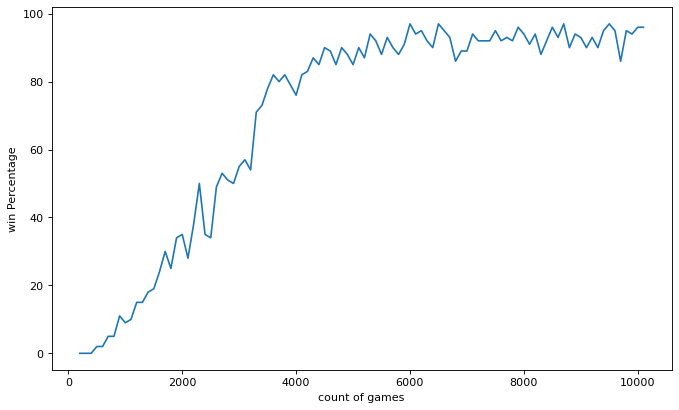

In [18]:
x = episod  # X-axis points
y = win  # Y-axis points

plt.figure(figsize=(10,6),dpi=80)
plt.plot(x, y)  # Plot the chart
plt.xlabel('count of games')
plt.ylabel('win Percentage')
plt.show()  # display

In [19]:
for episode in range(3):
    M.reset()
    state = M.action_space_sample()
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(0.5)
    

    for step in range(max_steps_per_episode):
        #clear_output(wait=True)
        time.sleep(1)
        #print(q_table[state,:])
        #print(np.argmax(q_table[state,:]))
        
        action = np.argmax(q_table[state,:])
        
        
        M.run_Steps_Game(action)
        reward = Minesweeper.Rewards
        new_state = M.action_space_sample()
        done = M.Done
        clear_output(wait=True)
        a = M.Show_Me_Colored(action)
        
        #print(new_state)
        if done :
            time.sleep(1)
            clear_output(wait=True)
            #M.reset()
            if M.Check_win(M.N,M.K) == 1:
                print("****You reached the goal!****")
                time.sleep(3)
            else:
                print ("****You lass!****")
                time.sleep(3)
            break
        state = new_state


****You reached the goal!****


for episode in range(3):
    M.reset()
    state = M.action_space_sample()
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(0.5)
    

    for step in range(max_steps_per_episode):
        #clear_output(wait=True)
        time.sleep(1)
        #print(q_table[state,:])
        #print(np.argmax(q_table[state,:]))
        action = np.argmax(q_table[state,:])
        
        
        M.run_Steps_Game(action)
        reward = Minesweeper.Rewards
        new_state = M.action_space_sample()
        done = M.Done
        clear_output(wait=True)
        a = M.Show_Me_Colored(action)
        
        #print(new_state)
        if done :
            time.sleep(1)
            clear_output(wait=True)
            #M.reset()
            if M.Check_win(M.N,M.K) == 1:
                print("****You reached the goal!****")
                time.sleep(3)
            else:
                print ("****You lass!****")
                time.sleep(3)
            break
        state = new_state
